In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
data_link = "https://drive.google.com/uc?id=1uZEltouyhdoUuzCiQ7dC1LcDKmWbmBPb"
column_names = [
    'area', 'perimeter', 'compactness', 
    'length_of_kernel', 'width_of_kernel', 
    'asymmetry_coeffecient', 'length_of_kernel_groove', 'result'
]
df = pd.read_csv(data_link, delim_whitespace=True, names=column_names)


C:\Users\Acer\AppData\Local\Temp\ipykernel_21476\565928073.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_link, delim_whitespace=True, names=column_names)


In [4]:
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coeffecient,length_of_kernel_groove,result
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     210 non-null    float64
 1   perimeter                210 non-null    float64
 2   compactness              210 non-null    float64
 3   length_of_kernel         210 non-null    float64
 4   width_of_kernel          210 non-null    float64
 5   asymmetry_coeffecient    210 non-null    float64
 6   length_of_kernel_groove  210 non-null    float64
 7   result                   210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.3 KB


In [6]:
df.describe()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coeffecient,length_of_kernel_groove,result
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [7]:
df.isnull().sum() #checking of null values

area                       0
perimeter                  0
compactness                0
length_of_kernel           0
width_of_kernel            0
asymmetry_coeffecient      0
length_of_kernel_groove    0
result                     0
dtype: int64

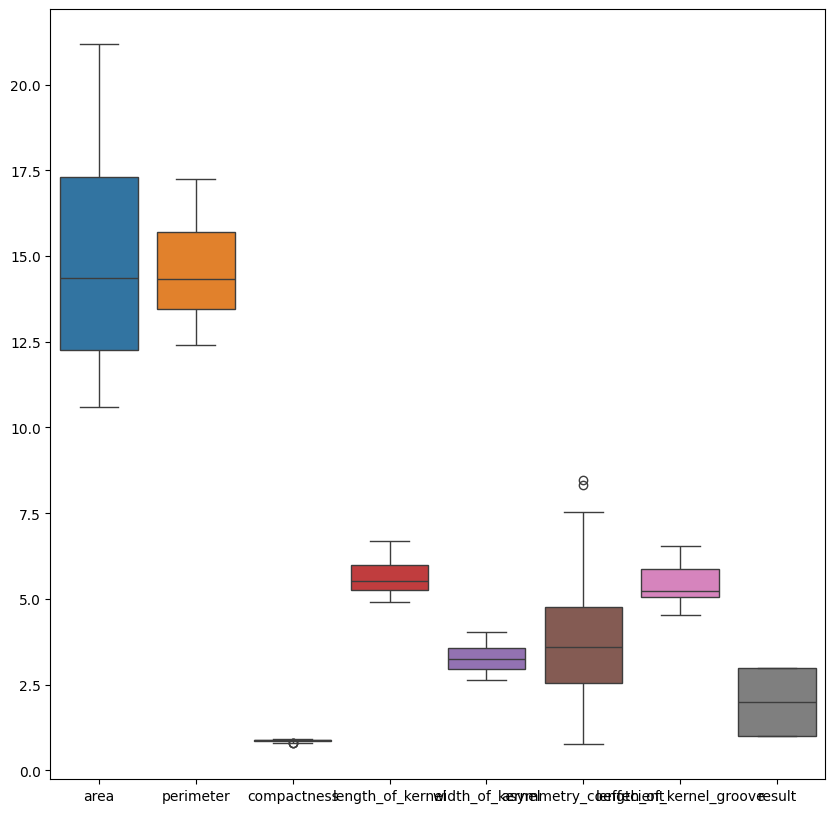

In [8]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df.select_dtypes(include=['float64', 'int64']))
plt.show()

In [9]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coeffecient,length_of_kernel_groove,result
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area                     205 non-null    float64
 1   perimeter                205 non-null    float64
 2   compactness              205 non-null    float64
 3   length_of_kernel         205 non-null    float64
 4   width_of_kernel          205 non-null    float64
 5   asymmetry_coeffecient    205 non-null    float64
 6   length_of_kernel_groove  205 non-null    float64
 7   result                   205 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 14.4 KB


In [20]:
X = df.drop(columns = 'result')
y = df['result'] #removes outlier 

In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
classifier = xgb.XGBClassifier()

In [15]:
y_test_adjust = y_test - 1
y_train_adjust = y_train - 1
classifier.fit(X_train, y_train_adjust)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
import pickle
with open('Wheat_Kernel_Classification_Final.pkl', 'wb') as file:
    pickle.dump((classifier, sc), file)

In [17]:
y_pred_xg = classifier.predict(X_test)

In [25]:
print("Accuracy Score of the XGBoost is ")
print(accuracy_score(y_test_adjust, y_pred_xg))
print("Confusion Matrix of the KNN is ")
print(confusion_matrix(y_test_adjust, y_pred_xg))
print("Classification Report of the KNN is\n")
print(classification_report(y_test_adjust, y_pred_xg))

Accuracy Score of the XGBoost is 
0.9512195121951219
Confusion Matrix of the KNN is 
[[12  0  1]
 [ 1 11  0]
 [ 0  0 16]]
Classification Report of the KNN is

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       1.00      0.92      0.96        12
           2       0.94      1.00      0.97        16

    accuracy                           0.95        41
   macro avg       0.95      0.95      0.95        41
weighted avg       0.95      0.95      0.95        41

